In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [7]:
test_info = pd.read_csv("./test_info.csv")
test_info

,test,workersCount,locationsCount,sampleSize,defaultMean,hbTimeout,stdDevCount,geoFactor,crashProb,delta,...,learningRate,regParam,numIterations,messageLossProb,stdevMargin,stdevFactor,pattern,rand,averageDetectiontime,mistakeRate
0,mlfd_test,100,20,200,3000.0,2 seconds,30,50.0,0.001,nil,...,1.0E-10,0.3,10,0.01,3.0,100.0,True,False,52821.433333,0.138889
1,mlfd_test,100,20,200,3000.0,2 seconds,30,50.0,0.001,nil,...,1.0E-10,0.3,10,0.01,3.0,100.0,False,False,39835.934426,0.142778
2,mlfd_test,100,20,200,3000.0,2 seconds,30,50.0,0.001,nil,...,1.0E-10,0.3,10,0.01,3.0,100.0,True,True,39625.216667,0.628889
3,epfd_test,100,20,nil,nil,2 seconds,30,50.0,0.001,2 seconds,...,nil,nil,nil,0.01,nil,100.0,True,False,115577.850000,0.102222
4,epfd_test,100,20,nil,nil,2 seconds,30,50.0,0.001,2 seconds,...,nil,nil,nil,0.01,nil,100.0,False,False,94771.400000,0.100556
5,epfd_test,100,20,nil,nil,2 seconds,30,50.0,0.001,2 seconds,...,nil,nil,nil,0.01,nil,100.0,False,True,126350.633333,0.111111


## Compare Failure detectors with different RTT patterns

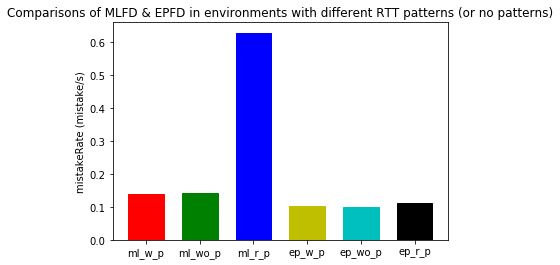

In [12]:
mlfdPattern = test_info.iloc[0]["mistakeRate"]
mlfdNoPattern = test_info.iloc[1]["mistakeRate"]
mlfdRandomPattern = test_info.iloc[2]["mistakeRate"]
epfdPattern = test_info.iloc[3]["mistakeRate"]
epfdNoPattern = test_info.iloc[4]["mistakeRate"]
epfdRandomPattern = test_info.iloc[5]["mistakeRate"]
data = [mlfdPattern, mlfdNoPattern, mlfdRandomPattern, epfdPattern, epfdNoPattern, epfdRandomPattern]
labels = ('ml_w_p', 'ml_wo_p', "ml_r_p", "ep_w_p", "ep_wo_p", "ep_r_p")
N = len(labels)
x = range(N)
width = 1/1.5
barlist = plt.bar(x, data, width, color="blue")
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')
barlist[3].set_color('y')
barlist[4].set_color('c')
barlist[5].set_color('k')
plt.xticks(np.arange(N), labels)
plt.ylabel('mistakeRate (mistake/s)')
plt.title('Comparisons of MLFD & EPFD in environments with different RTT patterns (or no patterns)')

(0, 10)

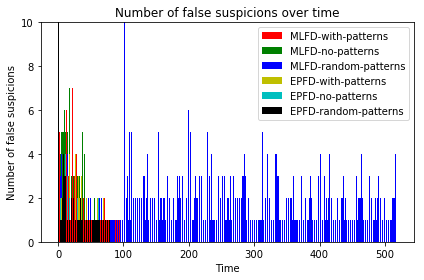

In [20]:
fs_mlfd_pattern = pd.read_csv('test5_pattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_mlfd_no_pattern = pd.read_csv('test5_nopattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_mlfd_random_pattern = pd.read_csv('test5_random_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_epfd_pattern = pd.read_csv('test5_pattern_epfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_epfd_no_pattern = pd.read_csv('test5_nopattern_epfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_epfd_random_pattern = pd.read_csv('test5_random_epfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
bar_width = 0.45
error_config = {'ecolor': '0.3'}
index1 = np.arange(len(fs_mlfd_pattern.values))
index2 = np.arange(len(fs_mlfd_no_pattern.values))
index3 = np.arange(len(fs_mlfd_random_pattern))
index4 = np.arange(len(fs_epfd_pattern.values))
index5 = np.arange(len(fs_epfd_no_pattern.values))
index6 = np.arange(len(fs_epfd_random_pattern))
plt.bar(index1, fs_mlfd_pattern.values, width=width, color='r', error_kw=error_config, label='MLFD-with-patterns')
plt.bar(index2 + bar_width, fs_mlfd_no_pattern.values, width=width, color='g', error_kw=error_config, label='MLFD-no-patterns')
plt.bar(index3 + bar_width, fs_mlfd_random_pattern.values, width=width, color='b', error_kw=error_config, label='MLFD-random-patterns')
plt.bar(index4 + bar_width, fs_epfd_pattern.values, width=width, color='y', error_kw=error_config, label='EPFD-with-patterns')
plt.bar(index5 + bar_width, fs_epfd_no_pattern.values, width=width, color='c', error_kw=error_config, label='EPFD-no-patterns')
plt.bar(index6 + bar_width, fs_epfd_random_pattern.values, width=width, color='K', error_kw=error_config, label='EPFD-random-patterns')
plt.xlabel('Time')
plt.ylabel('Number of false suspicions')
plt.title('Number of false suspicions over time')
plt.legend()
#lt.xticks(index1 + bar_width, ('MLFD', 'EPFD'))
plt.tight_layout()
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,10])

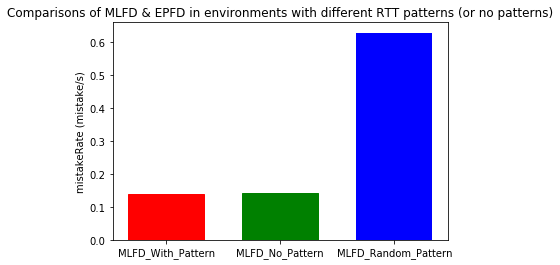

In [16]:
mlfdPattern = test_info.iloc[0]["mistakeRate"]
mlfdNoPattern = test_info.iloc[1]["mistakeRate"]
mlfdRandomPattern = test_info.iloc[2]["mistakeRate"]
data = [mlfdPattern, mlfdNoPattern, mlfdRandomPattern]
labels = ('MLFD_With_Pattern', 'MLFD_No_Pattern', "MLFD_Random_Pattern")
N = len(labels)
x = range(N)
width = 1/1.5
barlist = plt.bar(x, data, width, color="blue")
barlist[0].set_color('r')
barlist[1].set_color('g')
plt.xticks(np.arange(N), labels)
plt.ylabel('mistakeRate (mistake/s)')
plt.title('Comparisons of MLFD & EPFD in environments with different RTT patterns (or no patterns)')

(0, 10)

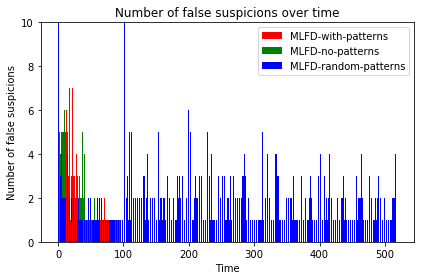

In [17]:

fs_mlfd_pattern = pd.read_csv('test5_pattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_mlfd_no_pattern = pd.read_csv('test5_nopattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_mlfd_random_pattern = pd.read_csv('test5_random_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
bar_width = 0.45
index1 = np.arange(len(fs_mlfd_pattern.values))
index2 = np.arange(len(fs_mlfd_no_pattern.values))
index3 = np.arange(len(fs_mlfd_random_pattern))
plt.bar(index1, fs_mlfd_pattern.values, width=width, color='r', error_kw=error_config, label='MLFD-with-patterns')
plt.bar(index2 + bar_width, fs_mlfd_no_pattern.values, width=width, color='g', error_kw=error_config, label='MLFD-no-patterns')
plt.bar(index3 + bar_width, fs_mlfd_random_pattern.values, width=width, color='b', error_kw=error_config, label='MLFD-random-patterns')
plt.xlabel('Time')
plt.ylabel('Number of false suspicions')
plt.title('Number of false suspicions over time')
plt.legend()
#lt.xticks(index1 + bar_width, ('MLFD', 'EPFD'))
plt.tight_layout()
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,10])

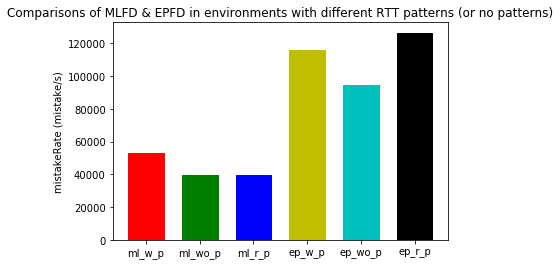

In [21]:
mlfdPattern = test_info.iloc[0]["averageDetectiontime"]
mlfdNoPattern = test_info.iloc[1]["averageDetectiontime"]
mlfdRandomPattern = test_info.iloc[2]["averageDetectiontime"]
epfdPattern = test_info.iloc[3]["averageDetectiontime"]
epfdNoPattern = test_info.iloc[4]["averageDetectiontime"]
epfdRandomPattern = test_info.iloc[5]["averageDetectiontime"]
data = [mlfdPattern, mlfdNoPattern, mlfdRandomPattern, epfdPattern, epfdNoPattern, epfdRandomPattern]
labels = ('ml_w_p', 'ml_wo_p', "ml_r_p", "ep_w_p", "ep_wo_p", "ep_r_p")
N = len(labels)
x = range(N)
width = 1/1.5
barlist = plt.bar(x, data, width, color="blue")
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')
barlist[3].set_color('y')
barlist[4].set_color('c')
barlist[5].set_color('k')
plt.xticks(np.arange(N), labels)
plt.ylabel('mistakeRate (mistake/s)')
plt.title('Comparisons of MLFD & EPFD in environments with different RTT patterns (or no patterns)')

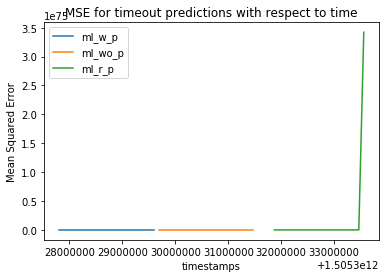

In [27]:
pattern_mlfd_eval = pd.read_csv("test5_pattern_mlfd/data/stats/testresults.csv")
nopattern_mlfd_eval = pd.read_csv("test5_nopattern_mlfd/data/stats/testresults.csv")
random_mlfd_eval = pd.read_csv("test5_random_mlfd/data/stats/testresults.csv")
time_pattern_mlfd = pattern_mlfd_eval["timestamp"].values
mse_pattern_mlfd = pattern_mlfd_eval["meanSquaredError"].values
time_nopattern_mlfd = nopattern_mlfd_eval["timestamp"].values
mse_nopattern_mlfd = nopattern_mlfd_eval["meanSquaredError"].values
time_random_mlfd = random_mlfd_eval["timestamp"].values
mse_random_mlfd = random_mlfd_eval["meanSquaredError"].values
plt.plot(time_pattern_mlfd, mse_pattern_mlfd, label="ml_w_p")
plt.plot(time_nopattern_mlfd, mse_nopattern_mlfd, label="ml_wo_p")
plt.plot(time_random_mlfd, mse_random_mlfd, label="ml_r_p")
plt.ylabel('Mean Squared Error')
plt.xlabel('timestamps')
plt.title('MSE for timeout predictions with respect to time')
plt.legend()
plt.show()

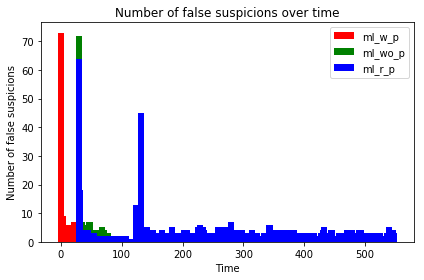

In [36]:
mlfd_pattern_fs = pd.read_csv('test5_pattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
mlfd_nopattern_fs = pd.read_csv('test5_nopattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
mlfd_random_fs = pd.read_csv('test5_random_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
bar_width = 10
error_config = {'ecolor': '0.3'}
index1 = np.arange(len(mlfd_pattern_fs.values))
index2 = np.arange(len(mlfd_nopattern_fs.values))
index3 = np.arange(len(mlfd_random_fs.values))
plt.bar(index1, mlfd_pattern_fs.values, width=bar_width, color='r', error_kw=error_config, label='ml_w_p')
plt.bar(index2 + bar_width*3, mlfd_nopattern_fs.values, width=bar_width, color='g', error_kw=error_config, label='ml_wo_p')
plt.bar(index3 + bar_width*3, mlfd_random_fs.values, width=bar_width, color='b', error_kw=error_config, label='ml_r_p')
plt.xlabel('Time')
plt.ylabel('Number of false suspicions')
plt.title('Number of false suspicions over time')
plt.legend()
#lt.xticks(index1 + bar_width, ('MLFD', 'EPFD'))
plt.tight_layout()
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([0,10])